# Correlation

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
![ ! -f "./bodyfat/Bodyfat.csv" ] && git clone "https://gist.github.com/eee599d5256f9db493a6eab32e1dcbcf.git" ./bodyfat/

In [3]:
body_fat = pd.read_csv("./bodyfat/Bodyfat.csv")

In [4]:
body_fat.sample(10)

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
120,1.0358,27.9,52,206.50,74.50,40.8,104.3,99.2,104.1,58.5,39.3,24.6,33.9,31.2,19.5
210,1.0829,7.1,49,140.50,68.00,35.8,91.2,79.4,89.0,51.1,35.0,21.7,30.9,28.8,17.4
199,1.0462,23.6,43,170.75,67.50,37.4,103.7,89.7,94.2,58.5,39.0,24.1,33.8,28.8,18.8
183,1.0713,12.1,40,159.25,69.75,35.3,92.3,86.8,96.1,58.0,39.4,22.7,30.0,26.4,17.4
133,1.0398,26.1,50,157.00,66.75,37.8,100.4,89.4,92.3,56.1,35.6,20.5,33.6,29.3,17.3
96,1.0770,9.6,38,188.75,73.25,37.5,99.1,91.6,102.4,60.6,39.4,22.9,31.6,30.1,18.5
71,1.0788,8.8,55,146.75,68.75,38.7,88.5,82.8,95.5,58.9,37.6,21.6,30.3,27.3,18.3
167,1.0525,20.3,35,224.75,72.25,43.9,108.2,100.4,106.8,63.3,41.7,24.6,37.2,33.1,19.8
180,1.0387,26.6,39,219.25,74.25,40.0,108.5,104.6,109.8,68.1,42.8,24.1,35.6,29.0,19.0
132,1.0452,23.6,47,197.00,73.25,37.8,103.6,99.8,103.2,61.2,38.1,22.6,33.5,28.6,17.9


In [5]:
weight_height = body_fat.filter(["Weight", "Height"])

In [6]:
weight_height.corr()

,Weight,Height
Weight,1.000000,0.308279
Height,0.308279,1.000000


# Scatter Plot

Text(0.5, 1.0, 'Scatter plot of Height vs. Weight')

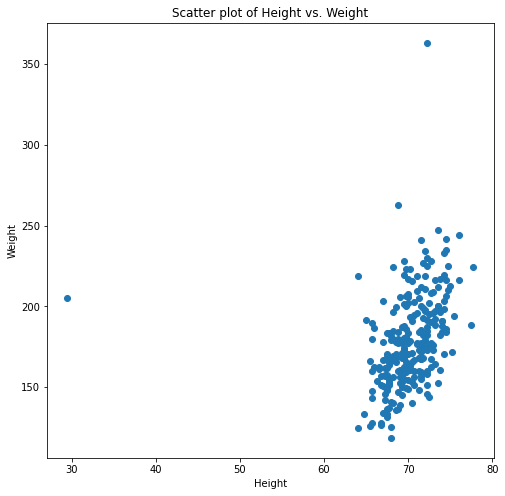

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(body_fat['Height'], body_fat['Weight'])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Scatter plot of Height vs. Weight")

# Remove Outliers

## By $1.5IQR$

In [8]:
height_iqr_lower = weight_height['Height'].quantile(0.25)
height_iqr_upper = weight_height['Height'].quantile(0.75)
weight_iqr_lower = weight_height['Weight'].quantile(0.25)
weight_iqr_upper = weight_height['Weight'].quantile(0.75)

In [9]:
body_fat_clean = weight_height[(body_fat['Height'] > height_iqr_lower) &
                               (body_fat['Height'] < height_iqr_upper) &
                               (body_fat['Weight'] < weight_iqr_upper) &
                               (body_fat['Weight'] > weight_iqr_lower)]

In [10]:
body_fat_clean

,Weight,Height
4,184.25,71.25
6,181.00,69.75
12,180.50,69.50
14,187.75,69.50
16,195.75,71.00
...,...,...
228,174.50,69.50
229,167.75,68.50
231,182.25,71.75
232,175.50,71.50


This doesn't look good because we've lost a lot of data due to the stretched shape of the blob.

Text(0.5, 1.0, 'Scatter plot of Height vs. Weight')

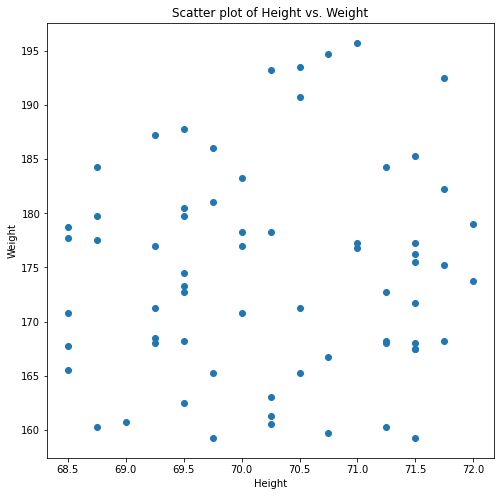

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(body_fat_clean['Height'], body_fat_clean['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter plot of Height vs. Weight')

In [12]:
body_fat_clean.corr()

,Weight,Height
Weight,1.000000,0.068109
Height,0.068109,1.000000


## By Observation

In [13]:
body_fat_clean = weight_height[(body_fat['Height'] > 40) & (body_fat['Weight'] < 350)]

Text(0.5, 1.0, 'Scatter plot of Height vs. Weight')

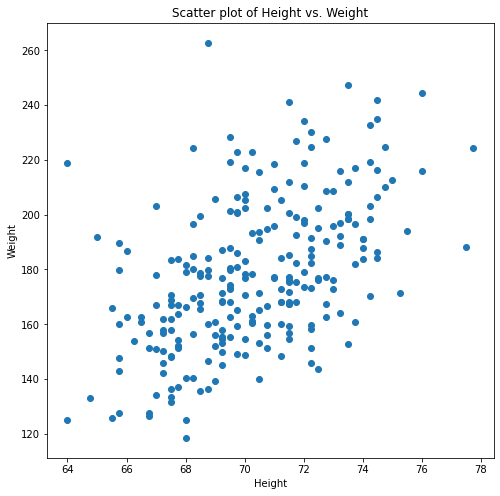

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(body_fat_clean['Height'], body_fat_clean['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter plot of Height vs. Weight')

In [15]:
body_fat_clean.corr()

,Weight,Height
Weight,1.000000,0.512913
Height,0.512913,1.000000


# Prediction

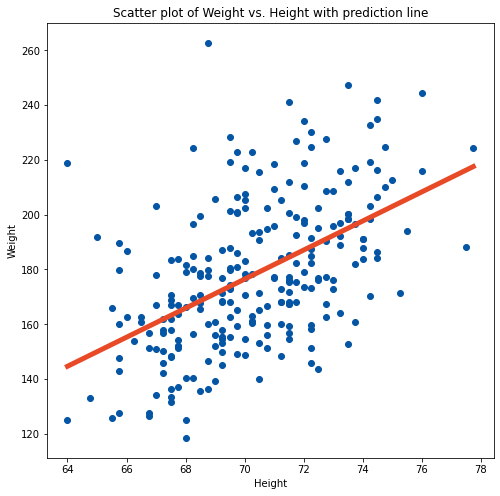

In [16]:
x_vals = np.array([np.min(body_fat_clean["Height"]), np.max(body_fat_clean["Height"])])
x_vals_standardized = (x_vals - body_fat_clean["Height"].mean()) / body_fat_clean["Height"].std(ddof=0)
y_predictions_standardized = body_fat_clean.corr()["Height"]["Weight"] * x_vals_standardized
y_predictions = y_predictions_standardized * body_fat_clean["Weight"].std(ddof=0) + body_fat_clean["Weight"].mean()
plt.figure(figsize=(8,8))
plt.scatter(body_fat_clean['Height'], body_fat_clean['Weight'], color='#0455A4')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Scatter plot of Weight vs. Height with prediction line")
plt.plot(x_vals, y_predictions, color='#E84A27', linewidth=5)